In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
%matplotlib inline
%config InlineBackend.figure_format='svg'

plt.style.use("seaborn-bright")

In [15]:
data = pd.read_csv('caso_full.csv')

In [16]:
data = data[['epidemiological_week','last_available_confirmed','last_available_deaths', 'place_type', 'is_repeated', 'state']]
data

,epidemiological_week,last_available_confirmed,last_available_deaths,place_type,is_repeated,state
0,9,1,0,city,False,SP
1,9,1,0,state,False,SP
2,9,1,0,city,False,SP
3,9,1,0,state,False,SP
4,9,1,0,city,False,SP
...,...,...,...,...,...,...
571549,34,104068,2948,state,False,RS
571550,34,129072,1960,state,False,SC
571551,34,69502,1757,state,False,SE
571552,34,730828,27905,state,False,SP


In [17]:
data_state = pd.DataFrame()

for i in range(len(data)):
    if ((data['place_type'][i]=='state') & (data['is_repeated'][i] == False)):
        data_state = data_state.append(data.iloc[i])
        
data_state = data_state.loc[(data_state['epidemiological_week']) <= 31]

In [18]:
data_state = data_state.groupby('epidemiological_week').max()
data_state = data_state.drop(['place_type'], axis=1)
data_state

,is_repeated,last_available_confirmed,last_available_deaths,state
epidemiological_week,,,,
9.0,0.0,2.0,0.0,SP
10.0,0.0,13.0,0.0,SP
11.0,0.0,65.0,0.0,SP
12.0,0.0,396.0,15.0,TO
13.0,0.0,1406.0,84.0,TO
14.0,0.0,4466.0,260.0,TO
15.0,0.0,8419.0,560.0,TO
16.0,0.0,13894.0,991.0,TO
17.0,0.0,20004.0,1667.0,TO


In [19]:
data_state['Letalidade'] = (data_state['last_available_deaths']/data_state['last_available_confirmed'])*100
data_state.head(100)

,is_repeated,last_available_confirmed,last_available_deaths,state,Letalidade
epidemiological_week,,,,,
9.0,0.0,2.0,0.0,SP,0.000000
10.0,0.0,13.0,0.0,SP,0.000000
11.0,0.0,65.0,0.0,SP,0.000000
12.0,0.0,396.0,15.0,TO,3.787879
13.0,0.0,1406.0,84.0,TO,5.974395
14.0,0.0,4466.0,260.0,TO,5.821764
15.0,0.0,8419.0,560.0,TO,6.651621
16.0,0.0,13894.0,991.0,TO,7.132575
17.0,0.0,20004.0,1667.0,TO,8.333333


In [20]:
data_state.reset_index(level=0, inplace=True)
data_state = data_state.drop(['is_repeated'], axis=1)
data_state

,epidemiological_week,last_available_confirmed,last_available_deaths,state,Letalidade
0,9.0,2.0,0.0,SP,0.000000
1,10.0,13.0,0.0,SP,0.000000
2,11.0,65.0,0.0,SP,0.000000
3,12.0,396.0,15.0,TO,3.787879
4,13.0,1406.0,84.0,TO,5.974395
5,14.0,4466.0,260.0,TO,5.821764
6,15.0,8419.0,560.0,TO,6.651621
7,16.0,13894.0,991.0,TO,7.132575
8,17.0,20004.0,1667.0,TO,8.333333
9,18.0,31174.0,2586.0,TO,8.295374


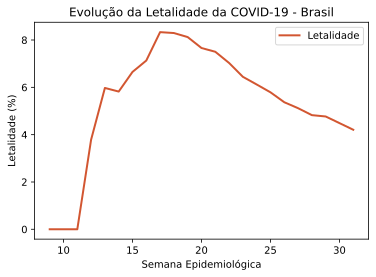

In [32]:
plt.plot(data_state['epidemiological_week'], data_state['Letalidade'], color= '#d25631', linewidth= 2, label = 'Letalidade')
plt.title("Evolução da Letalidade da COVID-19 - Brasil")
plt.xlabel("Semana Epidemiológica")
plt.ylabel("Letalidade (%)")
plt.legend(loc='best')

In [22]:
data_local = pd.DataFrame()

for i in range(len(data)):
    if ((data['place_type'][i]=='state') & (data['is_repeated'][i] == False)):
        data_local = data_local.append(data.iloc[i])
        
data_local = data_local.loc[(data_local['epidemiological_week']) <= 31]

data_local = data_local.groupby(['state','epidemiological_week']).max()

In [ ]:
data_local

In [23]:
data_local['Letalidade'] = (data_local['last_available_deaths']/data_local['last_available_confirmed'])*100
data_local.reset_index(level=0, inplace=True)
data_local.reset_index(level=0, inplace=True)
data_local

,epidemiological_week,state,is_repeated,last_available_confirmed,last_available_deaths,place_type,Letalidade
0,12.0,AC,0.0,11.0,0.0,state,0.000000
1,13.0,AC,0.0,25.0,0.0,state,0.000000
2,14.0,AC,0.0,46.0,0.0,state,0.000000
3,15.0,AC,0.0,72.0,2.0,state,2.777778
4,16.0,AC,0.0,142.0,6.0,state,4.225352
...,...,...,...,...,...,...,...
558,27.0,TO,0.0,12476.0,220.0,state,1.763386
559,28.0,TO,0.0,15132.0,255.0,state,1.685170
560,29.0,TO,0.0,17773.0,294.0,state,1.654195
561,30.0,TO,0.0,21767.0,346.0,state,1.589562


In [39]:
mg = pd.DataFrame()
sp = pd.DataFrame()
rj = pd.DataFrame()
es = pd.DataFrame()

mg = data_local[data_local['state'] == 'MG']
sp = data_local[data_local['state'] == 'SP']
rj = data_local[data_local['state'] == 'RJ']
es = data_local[data_local['state'] == 'ES']

In [83]:
import plotly.graph_objs as go

trace0 = go.Scatter(
    x = mg['epidemiological_week'],
    y = mg['Letalidade'],
    mode = "lines",
    marker = dict(size=10, color='#d25631'))

trace1 = go.Scatter(
    x = sp['epidemiological_week'],
    y = sp['Letalidade'],
    mode = "lines",
    marker = dict(size=10, color='#d25631'))

trace2 = go.Scatter(
    x = rj['epidemiological_week'],
    y = rj['Letalidade'],
    mode = "lines",
    marker = dict(size=10, color='#d25631'))

trace3 = go.Scatter(
    x = es['epidemiological_week'],
    y = es['Letalidade'],
    mode = "lines",
    marker = dict(size=10, color='#d25631'))

fig = plotly.subplots.make_subplots(rows=2, cols=2,subplot_titles=("Minas Gerais","São Paulo","Rio de Janeiro","Espirito Santo"))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)

fig.update_xaxes(title = "Semana Epidemiológica")

fig['layout'].update(height=600, width=900, title='Evolução da Letalidade da COVID-19 por UF (em %)',template="plotly_white", title_x = 0.5, showlegend = False, font_color="black", font_size = 10)
# plotly.offline.iplot(fig)
fig.show()

In [ ]:
data_state.to_csv('dados_agrupados', index= False)